### Problem Statement

I have large CSV files that I need that data to be analyzed.

My goal is to have someone create a python script that will analyze the data and produce a CSV result file.
I would like numpy and pandas libraries to be used in the creation of the python script.

I need the analysis to be done based on two date ranges.
The result would be grouped and reported based on zones and buildings.

Please let me know if you are interested.
Thanks

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [70]:
df=pd.read_excel('C:\\Users\\ASUS\\Desktop\\Freelancing Projects\\Data Analysis - CSV snd Python\\test_file.xlsx')
df.head()

C:\Users\ASUS\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Zone,BLDG,Serial Number,Meter Read,Meter Usage,Utility Type,Utility Unit,Date
0,Zone_7,6673L,BB00F191,43830,1220,All Water,Gallons,2021-09-01
1,Zone_4,6556L,BB00F0EA,22640,890,All Water,Gallons,2021-09-01
2,Zone_7,6733L,BB00F114,24850,790,All Water,Gallons,2021-09-01
3,Zone_7,6717L,BB00F049,29310,750,All Water,Gallons,2021-09-01
4,Zone_8,6726L,BB00BEFE,31140,730,All Water,Gallons,2021-09-01


In [71]:
df.shape

(48284, 8)

In [72]:
df.dtypes

Zone             object
BLDG             object
Serial Number    object
Meter Read        int64
Meter Usage       int64
Utility Type     object
Utility Unit     object
Date             object
dtype: object

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48284 entries, 0 to 48283
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Zone           48284 non-null  object
 1   BLDG           48284 non-null  object
 2   Serial Number  48284 non-null  object
 3   Meter Read     48284 non-null  int64 
 4   Meter Usage    48284 non-null  int64 
 5   Utility Type   48284 non-null  object
 6   Utility Unit   48284 non-null  object
 7   Date           48284 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.9+ MB


In [74]:
df.isnull().sum()

Zone             0
BLDG             0
Serial Number    0
Meter Read       0
Meter Usage      0
Utility Type     0
Utility Unit     0
Date             0
dtype: int64

In [77]:
df.describe()

,Meter Read,Meter Usage
count,48284.000000,48284.000000
mean,98360.516941,334.943252
std,72814.994765,218.260220
min,10.000000,0.000000
25%,39495.000000,210.000000
50%,85120.000000,290.000000
75%,143470.000000,420.000000
max,412990.000000,12820.000000


In [76]:
df.describe(include='all')

,Zone,BLDG,Serial Number,Meter Read,Meter Usage,Utility Type,Utility Unit,Date
count,48284,48284,48284,48284.000000,48284.000000,48284,48284,48284
unique,8,93,99,NaN,NaN,1,1,548
top,Zone_8,6673L,BB00F191,NaN,NaN,All Water,Gallons,2023-03-15
freq,9236,547,547,NaN,NaN,48284,48284,93
mean,NaN,NaN,NaN,98360.516941,334.943252,NaN,NaN,NaN
std,NaN,NaN,NaN,72814.994765,218.260220,NaN,NaN,NaN
min,NaN,NaN,NaN,10.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,39495.000000,210.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,85120.000000,290.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,143470.000000,420.000000,NaN,NaN,NaN


In [78]:
df['Date'].value_counts().unique()

array([93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 78, 75, 74, 72,
       69, 66, 65, 64, 61, 58, 55, 52, 49, 48, 47, 44, 43,  2],
      dtype=int64)

In [80]:
df['Date'].unique().sum()

'2021-09-012021-09-022021-09-032021-09-042021-09-052021-09-062021-09-072021-09-082021-09-092021-09-102021-09-112021-09-122021-09-132021-09-142021-09-152021-09-162021-09-172021-09-182021-09-192021-09-202021-09-212021-09-222021-09-232021-09-242021-09-252021-09-262021-09-272021-09-282021-09-292021-09-302021-10-012021-10-022021-10-032021-10-042021-10-052021-10-062021-10-072021-10-082021-10-092021-10-102021-10-112021-10-122021-10-132021-10-142021-10-152021-10-162021-10-172021-10-182021-10-192021-10-202021-10-212021-10-222021-10-232021-10-242021-10-252021-10-262021-10-272021-10-282021-10-292021-10-302021-10-312021-11-012021-11-022021-11-032021-11-042021-11-052021-11-062021-11-072021-11-082021-11-092021-11-102021-11-112021-11-122021-11-132021-11-142021-11-152021-11-162021-11-172021-11-182021-11-192021-11-202021-11-212021-11-222021-11-232021-11-242021-11-252021-11-262021-11-272021-11-282021-11-292021-11-302021-12-012021-12-022021-12-032021-12-042021-12-052021-12-062021-12-072021-12-082021-12-0

In [81]:
df['Date'].value_counts()

2023-03-15    93
2022-12-16    93
2022-12-27    93
2022-12-26    93
2022-12-25    93
              ..
2021-09-04    44
2021-09-03    44
2021-09-02    44
2021-09-05    43
2022-03-08     2
Name: Date, Length: 548, dtype: int64

In [82]:
df['Date'] = pd.to_datetime(df['Date'])

In [83]:
df

,Zone,BLDG,Serial Number,Meter Read,Meter Usage,Utility Type,Utility Unit,Date
0,Zone_7,6673L,BB00F191,43830,1220,All Water,Gallons,2021-09-01
1,Zone_4,6556L,BB00F0EA,22640,890,All Water,Gallons,2021-09-01
2,Zone_7,6733L,BB00F114,24850,790,All Water,Gallons,2021-09-01
3,Zone_7,6717L,BB00F049,29310,750,All Water,Gallons,2021-09-01
4,Zone_8,6726L,BB00BEFE,31140,730,All Water,Gallons,2021-09-01
...,...,...,...,...,...,...,...,...
48279,Zone_8,6750L,BB00B46F,113540,320,All Water,Gallons,2023-03-15
48280,Zone_8,6758L,BB00B44A,216040,320,All Water,Gallons,2023-03-15
48281,Zone_8,6766L,BB00B454,344160,530,All Water,Gallons,2023-03-15
48282,Zone_8,6774L,BB00B478,186480,220,All Water,Gallons,2023-03-15


- Here, we create a boolean mask that checks whether the date in the "Date" column of the DataFrame df is between the start and end dates we defined earlier. The mask is created by combining two conditions using the logical "and" operator (&):

df["Date"] >= start_date: checks whether the date is greater than or equal to the start date
df["Date"] <= end_date: checks whether the date is less than or equal to the end date
The resulting mask is a boolean Series that has the same length as the DataFrame, with True values for rows that meet the conditions and False values for rows that don't.

Finally, we use the loc accessor to filter the rows of the DataFrame based on the mask we created. The loc accessor is used to select rows and columns from a DataFrame using labels or boolean masks. In this case, we pass the mask to loc to select only the rows where the mask is True, effectively filtering out the rows that don't meet the date range condition. The resulting DataFrame, filtered_data, contains only the rows that fall within the specified date range.

In [85]:
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-12-25')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df

,Zone,BLDG,Serial Number,Meter Read,Meter Usage,Utility Type,Utility Unit,Date
10071,Zone_1,6625A,BB01039C,69990,1310,All Water,Gallons,2022-01-01
10072,Zone_3,6674A,BB012C6C,58330,790,All Water,Gallons,2022-01-01
10073,Zone_6,1955S,BB0046F4,54480,790,All Water,Gallons,2022-01-01
10074,Zone_7,6717L,BB00F049,114340,670,All Water,Gallons,2022-01-01
10075,Zone_4,6525L,BB00F133,69250,610,All Water,Gallons,2022-01-01
...,...,...,...,...,...,...,...,...
40846,Zone_8,6750L,BB00B46F,97160,120,All Water,Gallons,2022-12-25
40847,Zone_8,6758L,BB00B44A,183350,520,All Water,Gallons,2022-12-25
40848,Zone_8,6766L,BB00B454,300340,420,All Water,Gallons,2022-12-25
40849,Zone_8,6774L,BB00B478,165850,70,All Water,Gallons,2022-12-25


Grouping the data: The groupby() method is used to group the filtered data by the "Zone" and "Buildings" columns. This creates a new DataFrame with groups of rows that share the same "Zone" and "Buildings" values.

Aggregating the data: The agg() method is used to aggregate the data within each group. In this case, we want to calculate the total meter usage for each group, so we pass a dictionary to agg() with the key "Meter Usage" and the value np.sum. This tells pandas to apply the np.sum function to the "Meter Usage" column within each group and calculate the total.

The resulting DataFrame, grouped_data, has the total meter usage for each combination of "Zone" and "Buildings". The columns of the DataFrame are the grouping columns ("Zone" and "Buildings") and the aggregated column ("Meter Usage").

In [87]:
grouped_data = df.groupby(["Zone", "BLDG"]).agg({"Meter Read": np.sum, "Meter Usage": np.sum})

In [88]:
grouped_data

Meter Read  Meter Usage
Zone   BLDG                          
Zone_1 6549L    28110380        96820
       6557L    14737010        68020
       6565L    28222650       115000
       6573L    10795410        78490
       6581L    28704980        86930
...                  ...          ...
Zone_8 6750L    21294940        70150
       6758L    43434240       124060
       6766L    64397080       230840
       6774L    39086370       104600
       6782L    28444180       113780

[93 rows x 2 columns]

In [89]:
grouped_data = grouped_data.rename(columns={"Meter Usage": "Total Meter Usage","Meter Read":"TotalMeter Reading"})

In [90]:
grouped_data 

TotalMeter Reading  Total Meter Usage
Zone   BLDG                                        
Zone_1 6549L            28110380              96820
       6557L            14737010              68020
       6565L            28222650             115000
       6573L            10795410              78490
       6581L            28704980              86930
...                          ...                ...
Zone_8 6750L            21294940              70150
       6758L            43434240             124060
       6766L            64397080             230840
       6774L            39086370             104600
       6782L            28444180             113780

[93 rows x 2 columns]

In [91]:
grouped_data.to_csv("result_file.csv")

In [92]:
grouped = df.groupby(['Zone', 'BLDG'])

# calculate the mean meter usage for each group
result = grouped.agg({'Meter Usage': np.mean, 'Meter Read': np.mean})
result

Meter Usage     Meter Read
Zone   BLDG                             
Zone_1 6549L   280.637681   81479.362319
       6557L   197.159420   42715.971014
       6565L   333.333333   81804.782609
       6573L   285.418182   39256.036364
       6581L   252.703488   83444.709302
...                   ...            ...
Zone_8 6750L   203.333333   61724.463768
       6758L   359.594203  125896.347826
       6766L   671.046512  187200.813953
       6774L   303.188406  113293.826087
       6782L   329.797101   82446.898551

[93 rows x 2 columns]

In [50]:
result = result.reset_index().groupby(['Zone', 'BLDG']).mean()

In [51]:
result

Meter Usage     Meter Read
Zone   BLDG                             
Zone_1 6549L   277.348485   77903.143939
       6557L   183.768939   42708.920455
       6565L   356.497175   83123.521657
       6573L   263.622560   31696.507592
       6581L   264.471698   78513.132075
...                   ...            ...
Zone_8 6750L   189.634369   58070.329068
       6758L   363.126143  114849.780622
       6766L   552.220183  176101.266055
       6774L   302.376600  106061.279707
       6782L   334.223969   82220.628684

[93 rows x 2 columns]

In [60]:
result.groupby('Meter Usage')['Meter Read'].nunique()

Meter Usage
19.508197     1
28.500000     1
38.164251     1
55.737705     1
88.301158     1
             ..
573.501873    1
574.954296    1
631.703297    1
662.086466    1
674.491018    1
Name: Meter Read, Length: 93, dtype: int64

In [62]:
result

Meter Usage     Meter Read
Zone   BLDG                             
Zone_1 6549L   277.348485   77903.143939
       6557L   183.768939   42708.920455
       6565L   356.497175   83123.521657
       6573L   263.622560   31696.507592
       6581L   264.471698   78513.132075
...                   ...            ...
Zone_8 6750L   189.634369   58070.329068
       6758L   363.126143  114849.780622
       6766L   552.220183  176101.266055
       6774L   302.376600  106061.279707
       6782L   334.223969   82220.628684

[93 rows x 2 columns]

In [94]:
pivot_table = result.pivot_table(index='Zone', columns='BLDG', values='Meter Usage')

In [95]:
pivot_table

BLDG,1931S,1937S,1943S,1949S,1955S,1961S,1967S,1973S,1979S,1985S,...,6755L,6758L,6765L,6766L,6774L,6775L,6782L,6785L,Pool_Alegria,Pool_LaPaz
Zone,,,,,,,,,,,,,,,,,,,,,
Zone_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zone_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zone_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN
Zone_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333.311258
Zone_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zone_6,390.581395,425.826087,232.985507,316.0,328.115942,337.507246,221.681159,363.681159,227.246377,429.002933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zone_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,246.371681,NaN,308.550725,NaN,NaN,235.101449,NaN,424.782609,NaN,NaN
Zone_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,359.594203,NaN,671.046512,303.188406,NaN,329.797101,NaN,NaN,NaN


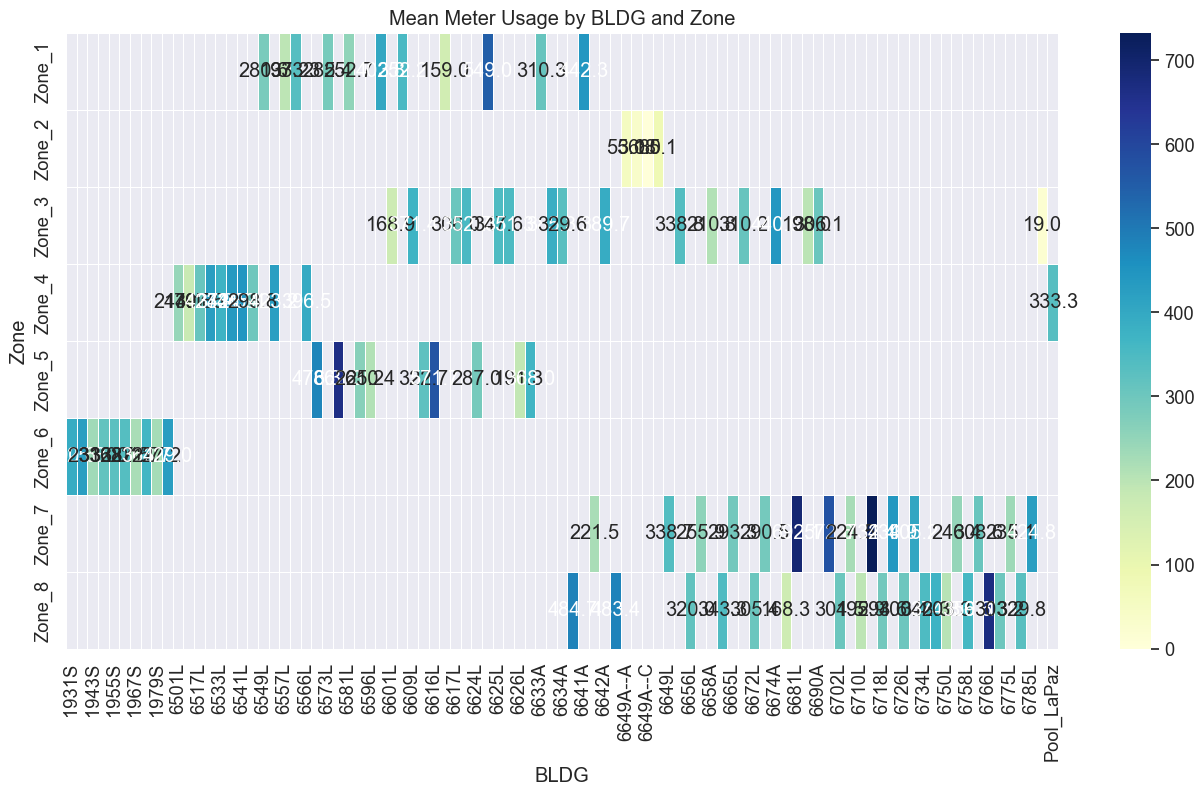

In [96]:
pivot_table = result.pivot_table(index='Zone', columns='BLDG')

# create a heatmap of the data using seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table['Meter Usage'], cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Mean Meter Usage by BLDG and Zone')
plt.xlabel('BLDG')
plt.ylabel('Zone')
plt.show()

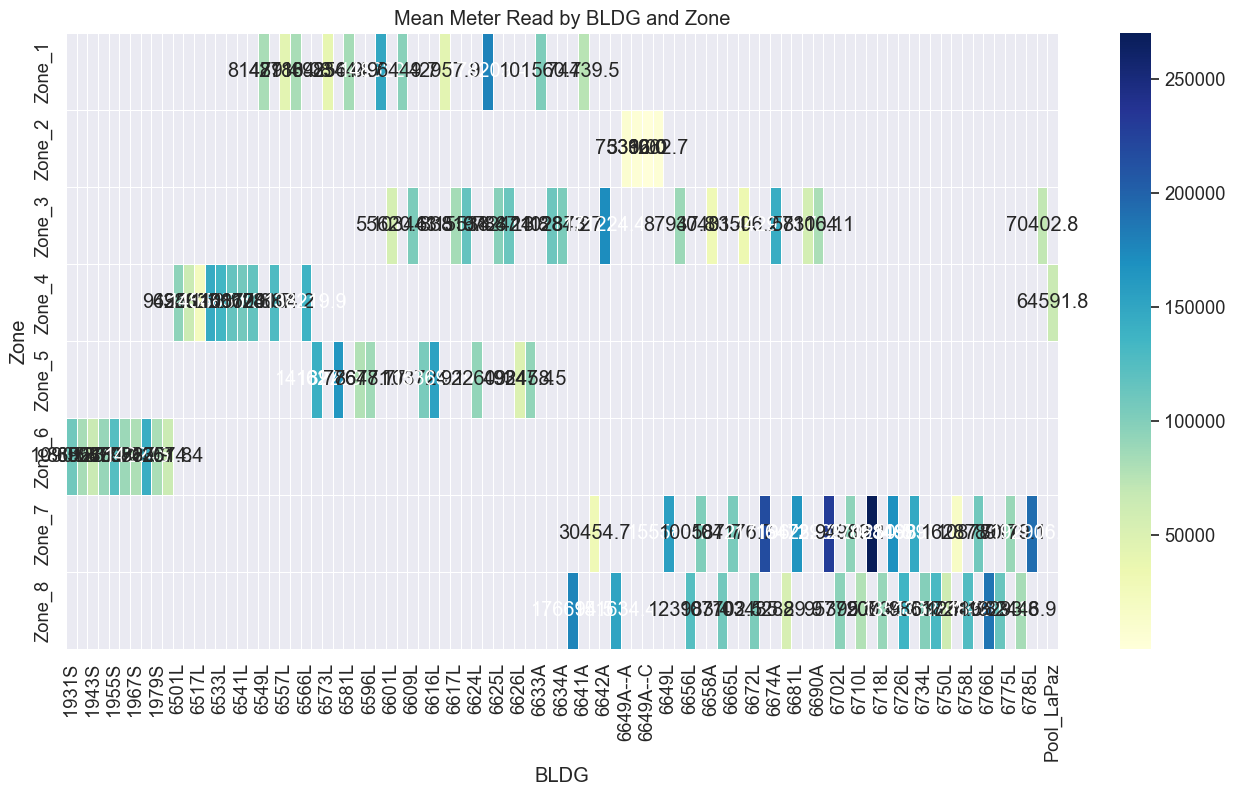

In [97]:
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table['Meter Read'], cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Mean Meter Read by BLDG and Zone')
plt.xlabel('BLDG')
plt.ylabel('Zone')
plt.show()

Text(0.5, 1.0, 'Meter Usage and Read by Zone and Building')

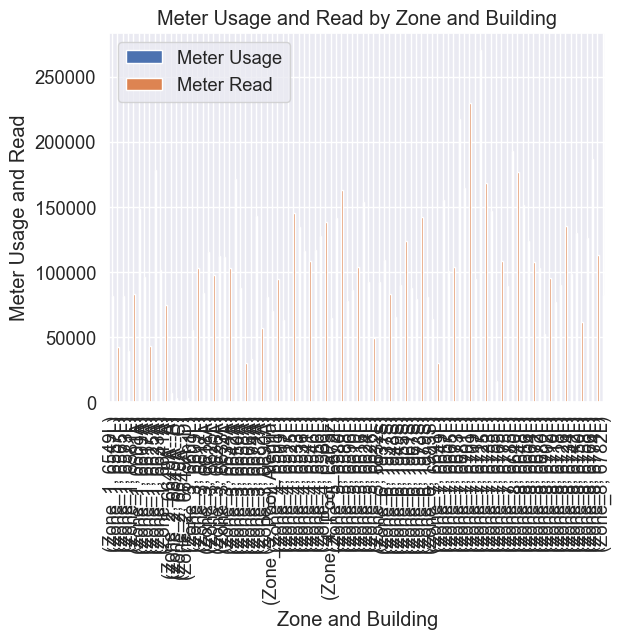

In [98]:
result.plot(kind="bar")
plt.xlabel("Zone and Building")
plt.ylabel("Meter Usage and Read")
plt.title("Meter Usage and Read by Zone and Building")